In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv('F://auto_mpg.csv')

In [4]:
df.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1


In [5]:
df.var()

MPG                 61.089611
Cylinders            2.893415
Displacement     10872.199152
Horsepower        1481.569393
Weight          717140.990526
Acceleration         7.604848
Model Year          13.672443
Origin               0.643292
dtype: float64

In [6]:
df1=df.drop('Model Year',axis=1,inplace=False)

In [7]:
df1.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,1
1,15.0,8,350.0,165.0,3693.0,11.5,1
2,18.0,8,318.0,150.0,3436.0,11.0,1
3,16.0,8,304.0,150.0,3433.0,12.0,1
4,17.0,8,302.0,140.0,3449.0,10.5,1


In [8]:
#independent data:-----> Input
#dependent data:---> output
X= df.iloc[:,1:]#--> independent
Y= df.iloc[:,0]#--> dependent
# we are seperating them as ind and dep

In [9]:
#sns.pairplot(df)

In [10]:
#Multi-colinearity
corr=X.corr()
corr

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
Cylinders,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
Displacement,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
Acceleration,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
Model Year,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
Origin,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


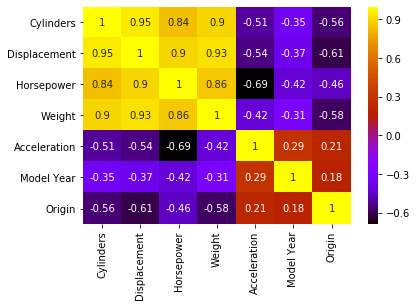

In [11]:
sns.heatmap(corr,annot=True,cmap='gnuplot')

In [12]:
#model building without multicolinearity

In [13]:
df.keys()

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [14]:
df.rename(columns={'Model Year':'Year'},inplace=True)

In [15]:
df.keys()

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [16]:
#model with all feature
#using statsmodels
model_all= sm.OLS.from_formula('MPG~Cylinders+Displacement+Horsepower+Weight+Acceleration+Year+Origin',data=df).fit()

In [17]:
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 26 Sep 2019   Prob (F-statistic):          2.04e-139
Time:                        10:29:37   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

# Dealing with Categorical Data:

In [18]:
df.head(2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1


In [19]:
#creating dummies
df_dum= pd.get_dummies(df['Origin'],prefix='origin')
df_dum.head()

,origin_1,origin_2,origin_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# Join or1 or2 or3 and remove Origin --> drop

df_new= pd.concat((df,df_dum),axis=1)
df_new.drop(labels='Origin',axis=1,inplace=True)
df_new.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


## VIF(Variance Inflation Factor):
###  1/(1-R^2)

In [21]:
df_new.to_csv('F:Auto_mpg_new.csv',index=False)

In [22]:
data= pd.read_csv('F:Auto_mpg_new.csv')

In [23]:
data.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0


In [24]:
#missing values
data.isnull().sum()/len(data)

MPG             0.000000
Cylinders       0.000000
Displacement    0.000000
Horsepower      0.015075
Weight          0.000000
Acceleration    0.000000
Year            0.000000
origin_1        0.000000
origin_2        0.000000
origin_3        0.000000
dtype: float64

- If the % of missing values is less than 5% drop the rows
- Missing values 5% to 30% replace with 
    - bayesiam method(mean,median,mode)
    - Intelligent method(use linear reg or logistic reg) to impute
- if more than 30% drop the column

In [25]:
data1= data.copy()
data1.dropna(axis=0,inplace=True)

In [26]:
data1.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
origin_1        0
origin_2        0
origin_3        0
dtype: int64

In [27]:
#before feature engg we have to split data to independent and dependent
X= data1.iloc[:,1:]# independent
Y= data1.iloc[:,0]# dependent

In [28]:
#feature engg---> backward elimination method.... before that check VIF

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
X.head(2)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0


In [31]:
vif= pd.DataFrame()
vif['Feature']= X.keys()
vif['VIF Score']= [variance_inflation_factor(X.values,i) for i in range(9)]

In [32]:
vif

,Feature,VIF Score
0,Cylinders,10.737771
1,Displacement,22.937950
2,Horsepower,9.957265
3,Weight,11.074349
4,Acceleration,2.625906
5,Year,1.301373
6,origin_1,490.166631
7,origin_2,131.742634
8,origin_3,158.310491


## Feature Engg:
- Backward elimination 

>- Build full model and drop worst p value(>0.025)

In [33]:
X.head(1)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,1,0,0


In [34]:
Y.head(1)

0    18.0
Name: MPG, dtype: float64

In [35]:
Xnew=sm.add_constant(X)
Xnew.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,origin_1,origin_2,origin_3
0,1.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,1.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,1.0,8,318.0,150.0,3436.0,11.0,70,1,0,0


In [36]:
#Model-1:

model_1= sm.OLS(Y,Xnew).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 26 Sep 2019   Prob (F-statistic):          1.79e-139
Time:                        10:29:40   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.0951      3.482     -3.474   

In [37]:
Xnew1=Xnew.drop('Acceleration',axis=1)

In [38]:
Xnew1.head(1)

,const,Cylinders,Displacement,Horsepower,Weight,Year,origin_1,origin_2,origin_3
0,1.0,8,307.0,130.0,3504.0,70,1,0,0


In [39]:
#Model-2

model_2= sm.OLS(Y,Xnew1).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     256.7
Date:                Thu, 26 Sep 2019   Prob (F-statistic):          1.49e-140
Time:                        10:29:40   Log-Likelihood:                -1020.8
No. Observations:                 392   AIC:                             2058.
Df Residuals:                     384   BIC:                             2089.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.8763      3.134     -3.470   

In [40]:
Xnew2= Xnew1.drop('Cylinders',axis=1)

In [41]:
Xnew2.head(1)

,const,Displacement,Horsepower,Weight,Year,origin_1,origin_2,origin_3
0,1.0,307.0,130.0,3504.0,70,1,0,0


In [42]:
#Model-3
model_3= sm.OLS(Y,Xnew2).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     297.9
Date:                Thu, 26 Sep 2019   Prob (F-statistic):          2.80e-141
Time:                        10:29:40   Log-Likelihood:                -1022.0
No. Observations:                 392   AIC:                             2058.
Df Residuals:                     385   BIC:                             2086.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.7857      3.086     -3.819   

In [43]:
#or
#model_3= sm.OLS(Y,Xnew2).fit()
#print(model_3.pvalues.sort_values(ascending=False))      ----> this is to check p-values so that we can drop that column

In [44]:
Xnew3= Xnew2.drop('Horsepower',axis=1)
Xnew3.head(1)

,const,Displacement,Weight,Year,origin_1,origin_2,origin_3
0,1.0,307.0,3504.0,70,1,0,0


In [45]:
#Model-4
model_4= sm.OLS(Y,Xnew3).fit()
print(model_4.pvalues.sort_values(ascending=False))

Displacement    6.310945e-02
origin_3        5.617571e-04
origin_2        1.933541e-04
const           8.881597e-06
origin_1        5.291429e-08
Weight          8.593736e-29
Year            2.500256e-43
dtype: float64


In [46]:
#now drop Displacement:
Xnew4= Xnew3.drop('Displacement',axis=1)

In [47]:
#Model-5
model_5= sm.OLS(Y,Xnew4).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     437.9
Date:                Thu, 26 Sep 2019   Prob (F-statistic):          3.53e-142
Time:                        10:29:41   Log-Likelihood:                -1026.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     387   BIC:                             2082.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.6825      2.974     -4.265      0.0

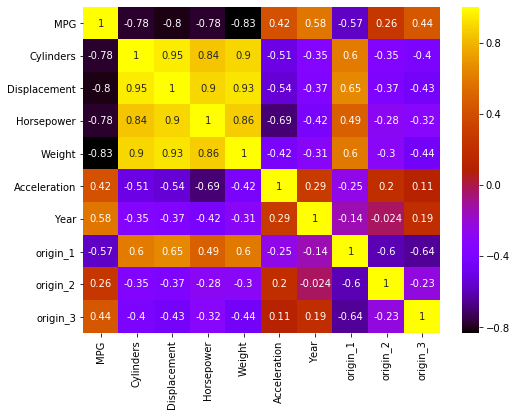

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='gnuplot')

In [49]:
#save the data
Xnew4.drop('const',axis=1,inplace=True)
Xnew4.head(1)

,Weight,Year,origin_1,origin_2,origin_3
0,3504.0,70,1,0,0


In [50]:
vif= pd.DataFrame()
vif['Feature']= Xnew4.keys()
vif['VIF Score']= [variance_inflation_factor(Xnew4.values,i) for i in range(5)]
vif

,Feature,VIF Score
0,Weight,1.711383
1,Year,1.128435
2,origin_1,354.989179
3,origin_2,94.154504
4,origin_3,112.690878


# Sci-kit Learn

In [51]:
#Random sampling:
#spliting the data intlo two parts----> Training and Testing 
np.random.seed(1000)
from sklearn.model_selection import train_test_split  #random sampling
x_train,x_test,y_train,y_test=train_test_split(Xnew4,Y,test_size=0.2)#---> 0.2 means 20% testing purpose

In [52]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((313, 5), (79, 5), (313,), (79,))

In [53]:
len(Xnew4)

392

In [54]:
#train model with Training data:
from sklearn.linear_model import LinearRegression

In [55]:
model= LinearRegression()

In [56]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
model.intercept_,model.coef_

(-15.872407845194754,
 array([-0.00593179,  0.75700575, -1.35067576,  0.75648441,  0.59419135]))

# Statistical Evaluation:

- ANOVA
>- F-Statistics= $\frac{\frac{SSR}{DFssr}}{\frac{SSE}{DFsse}}$
        - dfssr=k
        -dfsse= 1-n-k
        - ssr= sum(Y_pred-y_pread.mean)^2
        -sse= sum(y_pred-y_actual)^2
        - n = no.of samples
        -k= no.of independent variables

In [58]:
y_pred= model.predict(x_test)

In [59]:
x_test.shape

(79, 5)

In [60]:
#Always test data:
n= len(x_test)
k=x_test.shape[1]
df_ssr= k
df_sse= n-1-k

In [61]:
#ANOVA:

ssr= np.sum(np.square(y_pred-y_pred.mean()))
sse= np.sum(np.square(y_pred-y_test))
sst1= sse+ssr
#sst=np.sum(np.square(y_test-y_pred.mean()))

In [62]:
sse,ssr,sst1

(1014.5591494179108, 4332.4461653761555, 5347.005314794066)

# $R^2$:
    - Explained variance

In [63]:
rsquare= ssr/sst1
rsquare

0.8102565661173304

**F-STATS**

In [64]:
Fstats= (ssr/df_ssr)/(sse/df_sse)
Fstats

62.346009151642676

In [65]:
from scipy import stats

In [66]:
# f: two tail test

prob=0.025
stats.f.ppf(prob,df_ssr,df_sse)

0.16383633938824957

In [67]:
prob=0.975
stats.f.ppf(prob,df_ssr,df_sse)

2.7457383821699946

In [68]:
# prob

#stats.f.cdf(Fstats,df_ssr,df_sse)----> 0.9999999999..
1-stats.f.cdf(Fstats,df_ssr,df_sse)

1.1102230246251565e-16

## RESIDUAL ANALYSIS:
 - Homoscarsidy
 - Hetroscarsidy(q-q)(normality test)

In [69]:
residual= y_test-y_pred

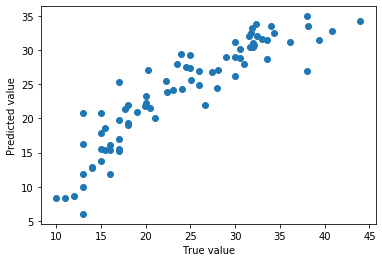

In [70]:
#Homo
plt.scatter(y_test,y_pred)

plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.show()

# there is no Homoscarasidy behaviour 

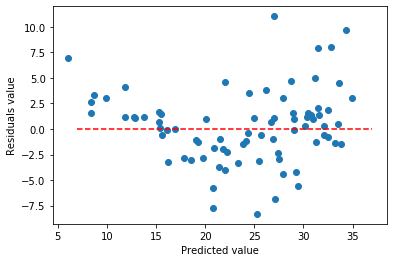

In [71]:
plt.scatter(y_pred,residual)
plt.plot([7,37],[0,0],'r--')
plt.xlabel("Predicted value")
plt.ylabel("Residuals value")
plt.show()

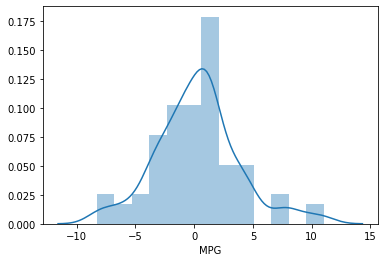

In [72]:
#Hetro-----> talks about pattern
sns.distplot(residual)
plt.show()

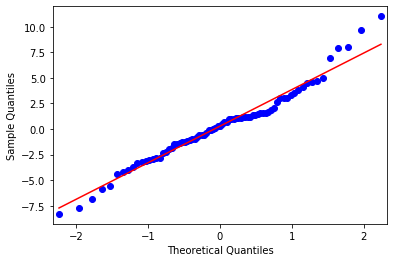

In [73]:
fig=sm.graphics.qqplot(residual,line='s')

- H0 : Normal dist(p>0.05)
- Ha : not normal dist(p<0.05)

In [74]:
stats.shapiro(residual) # 1st one weight and 2nd one is p-value and we have to check wether it is in bulk region or critical region

(0.975357174873352, 0.12960845232009888)

- Since p-value is 0.129 which falls in bulk region,hence selecting it forms normal distribution(model identities pattern in the data)

# Leverage:(Always for training data)

 ## $$Leverage, h= \frac{(Standardized-pred-value)^2+1)}{n}$$
 
 - standardized pred value---->

In [75]:
y_pred_train=model.predict(x_train)
residuals_train=y_train-y_pred_train

In [76]:
y_pred_train # we have to convert that into standard value(i.e z-Score)

array([11.28371071, 26.32895723, 33.98359368, 31.23793524, 35.62896194,
       31.69844978, 26.74249761,  8.93698586, 24.88811114,  9.79935815,
       19.52522686, 29.28044531, 12.66214852, 17.62167124, 30.84965593,
       25.76512818, 17.36379308, 21.1318839 , 17.02060682, 20.19099273,
       28.28335676, 26.31314583,  8.37206039, 24.84432555, 24.23561449,
       22.78232651, 15.3068684 , 17.25108911, 19.1091443 , 23.21308394,
       29.32423089, 23.79611399,  9.94031541, 19.66813798, 29.17322308,
       24.87408266, 24.82962059, 23.01956792, 23.3317197 , 15.37297549,
       13.86122706,  9.80981608, 12.35736428, 27.35117857, 23.46023506,
       26.72837096, 28.71692548, 33.30596424, 27.94576298, 31.84674447,
       35.599303  , 11.9280125 , 30.52762454, 23.37495707,  8.67005542,
       30.16963514, 27.38408628, 18.65239665, 27.80058879, 10.92187166,
       32.15592658, 15.45516309, 24.33590667, 26.38234331, 25.52421806,
       27.18738169, 32.05282312, 26.70999728, 29.47121811, 23.07

In [77]:
y_pred_train.mean(),y_pred_train.std()

(23.278913738019163, 6.914774844571141)

In [78]:
def zscore(x):
    std= pd.Series(x).std()
    z=(x-x.mean())/std
    return z

In [79]:
y_pred_stand= zscore(y_pred_train)    #y_pred_train is x value

In [80]:
residuals_normalized = zscore(residuals_train)
residuals_normalized_square = np.square(residuals_normalized)

In [81]:
#Leverage
n= len(x_train)
h= (np.square(y_pred_stand)+1) / n

In [82]:
#h

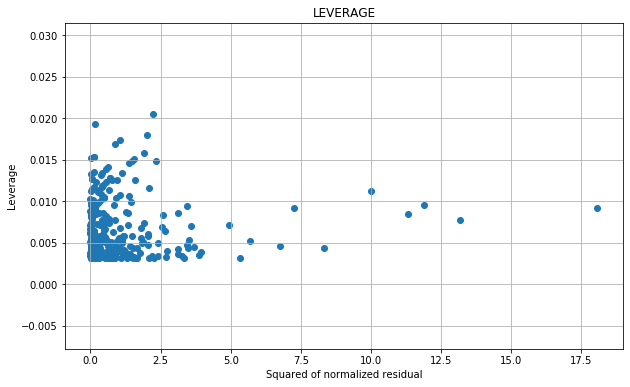

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(residuals_normalized_square,h)
plt.xlabel('Squared of normalized residual')
plt.ylabel('Leverage'),plt.title('LEVERAGE')
plt.grid()
plt.show()

In [84]:
summary_frame= pd.DataFrame()

In [85]:
summary_frame['y_train']=y_train
summary_frame['y_train_pred']= y_pred_train
summary_frame['residual']=residuals_train
summary_frame['normalized_residual']= residuals_normalized
summary_frame['Leverage']= h

In [86]:
summary_frame.head()

,y_train,y_train_pred,residual,normalized_residual,Leverage
139,14.0,11.283711,2.716289,0.834642,0.012778
51,30.0,26.328957,3.671043,1.128012,0.003815
380,36.0,33.983594,2.016406,0.619587,0.010827
395,32.0,31.237935,0.762065,0.234162,0.007414
343,39.1,35.628962,3.471038,1.066556,0.013354


# Cook Distance:
# $Di=\frac{e^2i}{ps^2}\frac{hi}{(1-hi)^2}$


In [87]:
num= summary_frame['residual']**2
d1=num/(k*summary_frame['residual'].var())

In [88]:
d2= summary_frame['Leverage']/np.square((1-summary_frame['Leverage']))

In [89]:
D= np.multiply(d1,d2)

In [90]:
summary_frame['cook_d']= D

In [91]:
summary_frame.reset_index(inplace=True)

In [92]:
summary_frame.head()

,index,y_train,y_train_pred,residual,normalized_residual,Leverage,cook_d
0,139,14.0,11.283711,2.716289,0.834642,0.012778,0.001827
1,51,30.0,26.328957,3.671043,1.128012,0.003815,0.000978
2,380,36.0,33.983594,2.016406,0.619587,0.010827,0.000850
3,395,32.0,31.237935,0.762065,0.234162,0.007414,0.000083
4,343,39.1,35.628962,3.471038,1.066556,0.013354,0.003121


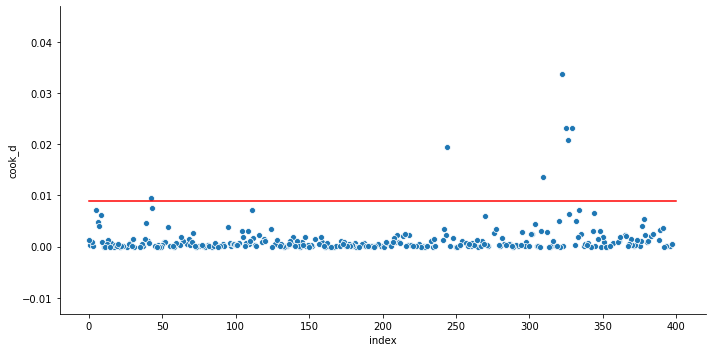

In [93]:
sns.relplot(x='index',y='cook_d',data=summary_frame,aspect=2)
plt.plot([0,400],[0.009,0.009],'r-')

### Removing  rows with cook_dist more than 0.009

In [94]:
outliers_ind = summary_frame[summary_frame['cook_d']>0.009]['index'].values
outliers_ind

array([244, 329, 326, 322, 325, 309,  42], dtype=int64)

In [95]:
x_train_new= x_train.drop(labels=outliers_ind,axis=0)
y_train_new= y_train.drop(labels=outliers_ind,axis=0)

# Building the model by removing outliers:

In [96]:
model_new= LinearRegression()
model_new.fit(x_train_new,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
model_new.score(x_train_new,y_train_new)

0.8415476275618518

In [98]:
model.score(x_train,y_train)

0.8191326758299218

In [99]:
model.coef_

array([-0.00593179,  0.75700575, -1.35067576,  0.75648441,  0.59419135])

In [100]:
model_new.coef_

array([-0.00595189,  0.6954854 , -0.955094  ,  0.2766171 ,  0.6784769 ])

In [101]:
model.intercept_

-15.872407845194754

In [102]:
model_new.intercept_

-11.572493803829456

# Saving model:

In [103]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [104]:
joblib.dump(model_new,'mpg_estimator.pickle')

['mpg_estimator.pickle']

In [105]:
#loading pickle file
est= joblib.load('mpg_estimator.pickle')

In [106]:
#testing:
test= np.array([4638,74,1,0,0]).reshape(1,-1)  #before reshaping we have to check shape of the model
test

array([[4638,   74,    1,    0,    0]])

In [107]:
est.predict(test)

array([11.33347956])

In [108]:
#11.33+- Marginal error----> t-dist and standard erro:
